In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
from venn import venn

In [3]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]
    return set(df.index)

In [4]:
usa = pd.read_csv("output/USACoV_vs_HB_ALLProbes.csv", index_col=0)
pl = pd.read_csv("output/PLCoV_vs_HB_ALLProbes.csv", index_col=0)
spain = pd.read_csv("output/SpainCoV_vs_HB_ALLProbes.csv", index_col=0)

In [5]:
usa = extract(usa)
pl = extract(pl)
spain = extract(spain)

In [6]:
len(usa), len(pl), len(spain)

(139, 4728, 1251)

<AxesSubplot:>

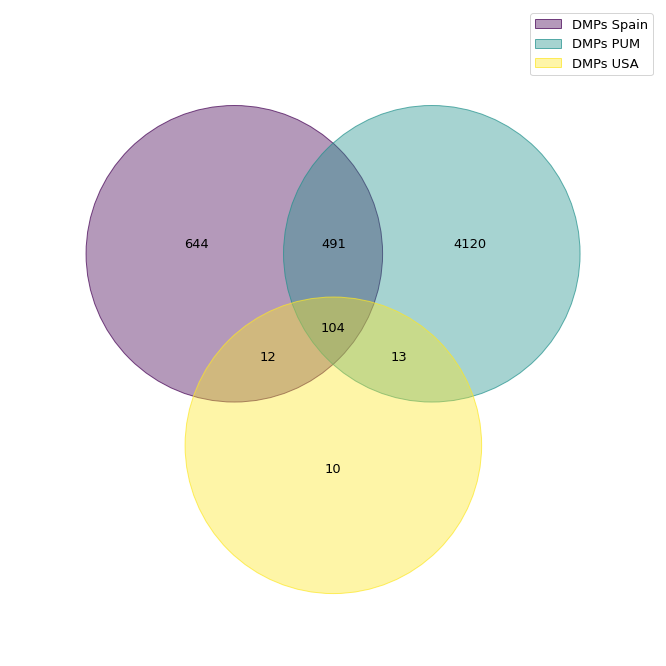

In [45]:
venn({
     "DMPs Spain": spain,
     "DMPs PUM": pl,
"DMPs USA": usa,}, figsize=(12, 12))

In [49]:
intersection = set.intersection(pl, spain, usa)
intersection = pd.DataFrame(intersection, columns=["CpG"]).to_csv("../DMPsInAllCoVGroup")

In [46]:
# Non coivd vs HB

In [47]:
report = extract(pd.read_csv("output/USANoNCoV_vs_HB_ALLProbes.csv", index_col=0))

<AxesSubplot:>

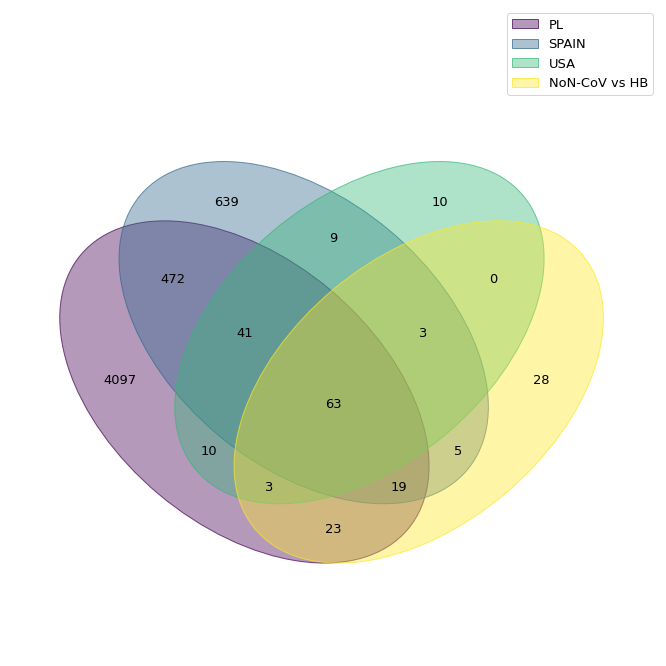

In [48]:
venn({
     "PL": pl,
    "SPAIN": spain,
    "USA": usa,
     "NoN-CoV vs HB": report}, figsize=(12, 12))